In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline

In [12]:
df = pd.read_csv('LoanStats3a.csv', low_memory=False)

UnboundLocalError: local variable 'pos' referenced before assignment

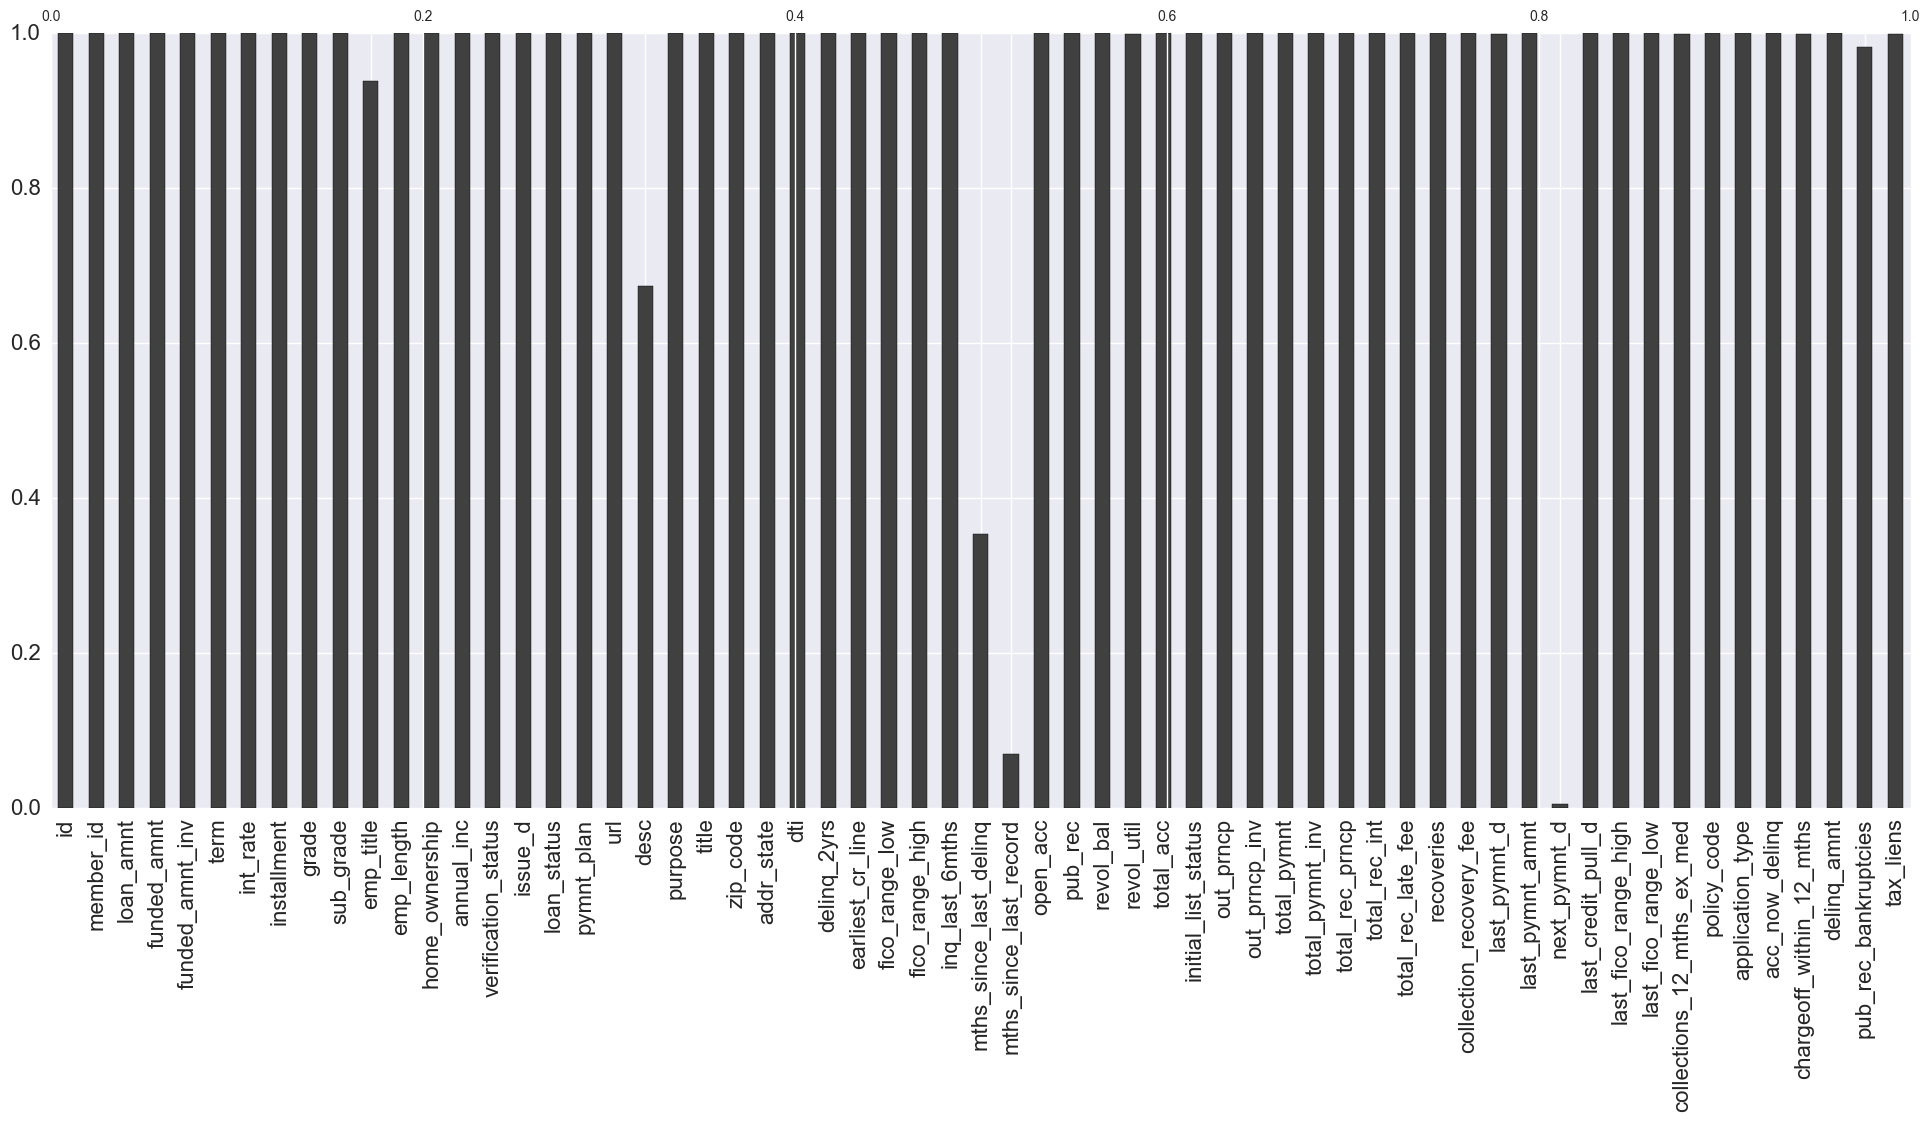

In [13]:
msno.bar(df)

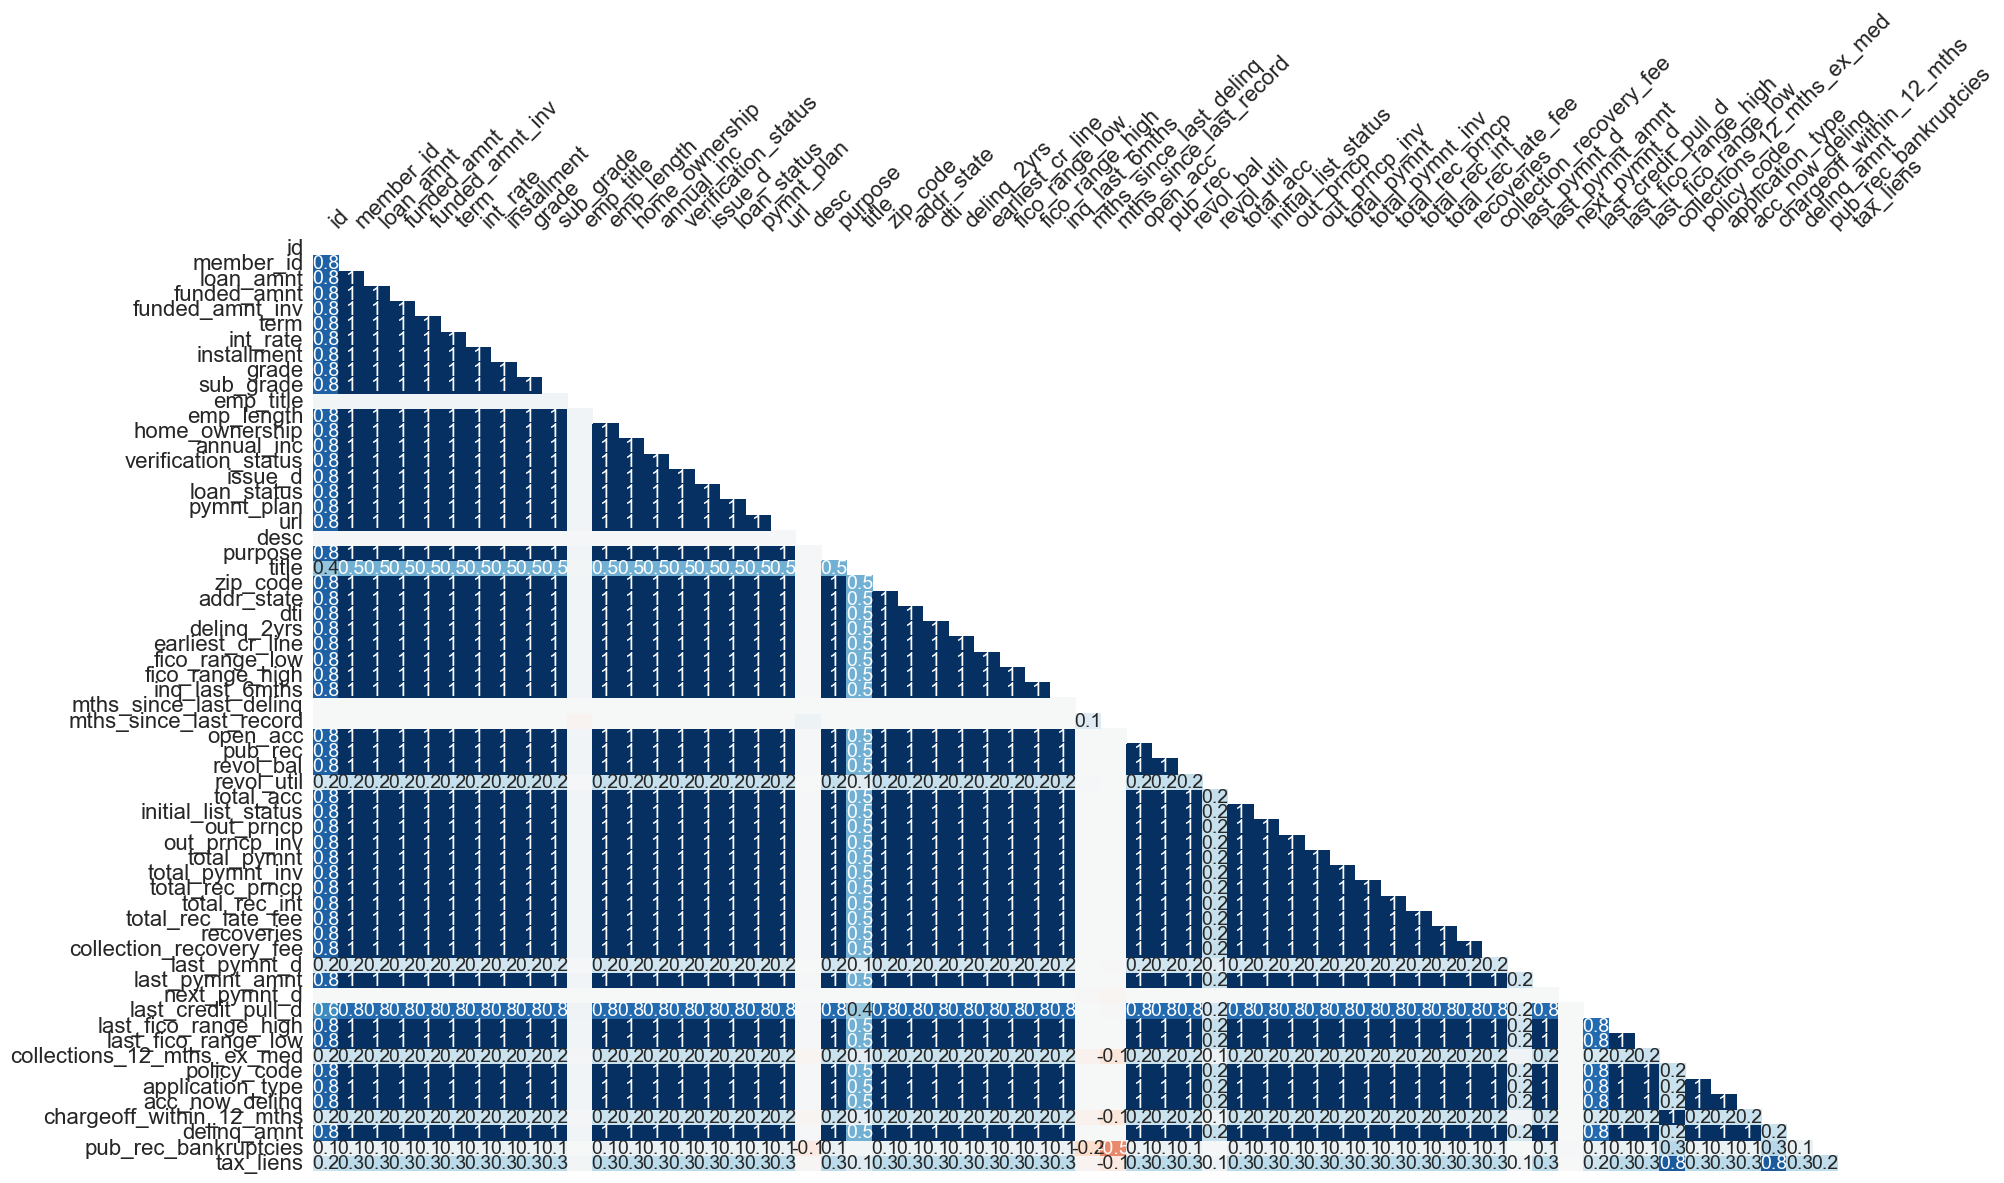

In [14]:
msno.heatmap(df)

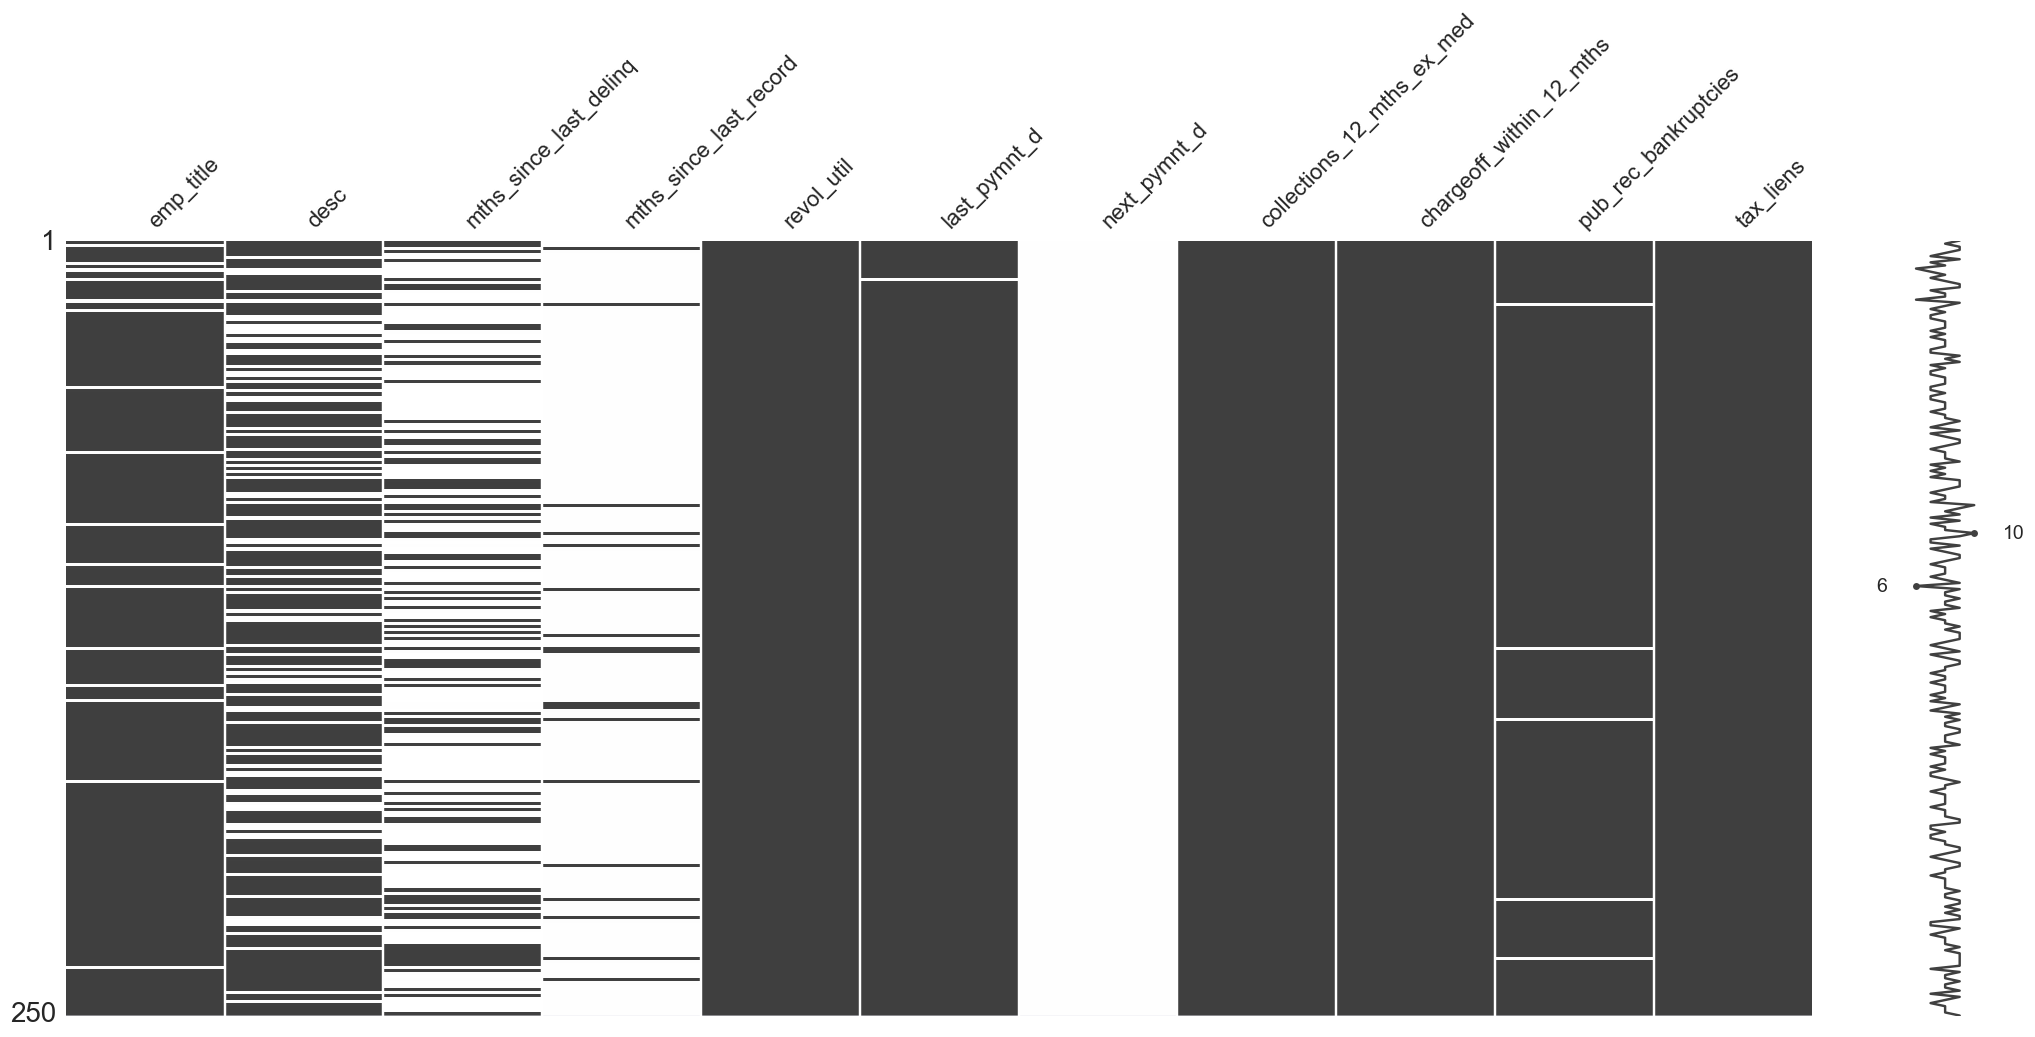

In [15]:
filtered_data = msno.nullity_filter(df, filter='bottom', n=15, p=0.999) # or filter='top'
msno.matrix(filtered_data.sample(250))


In [16]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,714.0,710.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [19]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_n

My interest is in the loan status. I want to know if I can predict if a loan will be charged off or not.
Thus there are multiple predictors that can be removed since they  reasonably have no bearing on the predictive power of the model I wish to create:

*id*
*member_id*
*loan_amnt* This is too highly correlated with funded_amnt # add code to prove this
*url* simply links to lending club website
*policy_code* they are all 1
*Application Type*

response - **loan_status**

predictors -

### Categorical
*term*
*home_ownership*
*grade*
*sub_grade* there will be multicollinearity but we can try to find the better predictor (or remove one and try it again)

In [20]:
df.drop('id', axis=1, inplace=True)
df.drop('member_id', axis=1,  inplace=True)
df.drop('url', axis=1,  inplace=True)

In [23]:
df.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39786.000000,39786.000000,39786.000000,39786.000000,3.978600e+04,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,...,39786.000000,39786.000000,39786.000000,39730.0,39786.0,39786.0,39730.0,39786.0,39089.000000,39747.0
mean,11231.360277,10958.722289,10409.018679,324.733637,6.897907e+04,13.317794,0.146534,714.997989,718.997989,0.869049,...,2679.163550,691.262253,678.891947,0.0,1.0,0.0,0.0,0.0,0.043286,0.0
std,7464.542832,7194.076908,7135.760122,208.923212,6.376263e+04,6.678300,0.491826,35.840682,35.840682,1.070069,...,4443.333983,79.663624,116.775202,0.0,0.0,0.0,0.0,0.0,0.204381,0.0
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,625.000000,629.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,825.000000,829.000000,8.000000,...,36115.200000,850.000000,845.000000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


Let's drop all the ones that showed up with stdev of 0
*acc_now_delinq*
*chargeoff_within_12_mths*
*delinq_amnt*
*policy_code*
*collections_12_mths_ex_med*
*tax_liens*

In [27]:
df.drop('acc_now_delinq', axis=1, inplace=True)
df.drop('chargeoff_within_12_mths', axis=1,  inplace=True)
df.drop('delinq_amnt', axis=1,  inplace=True)
df.drop('policy_code', axis=1,  inplace=True)
df.drop('collections_12_mths_ex_med', axis=1,  inplace=True)
df.drop('tax_liens', axis=1,  inplace=True)

In [28]:
df.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies
count,39786.000000,39786.000000,39786.000000,39786.000000,3.978600e+04,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,...,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39089.000000
mean,11231.360277,10958.722289,10409.018679,324.733637,6.897907e+04,13.317794,0.146534,714.997989,718.997989,0.869049,...,11640.650255,9852.818232,2276.222849,1.388342,96.574445,12.602901,2679.163550,691.262253,678.891947,0.043286
std,7464.542832,7194.076908,7135.760122,208.923212,6.376263e+04,6.678300,0.491826,35.840682,35.840682,1.070069,...,9063.150973,7139.414921,2632.107989,7.397524,695.044721,149.753950,4443.333983,79.663624,116.775202,0.204381
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,625.000000,629.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,825.000000,829.000000,8.000000,...,58563.680000,35000.020000,23878.150000,180.200000,29623.350000,7002.190000,36115.200000,850.000000,845.000000,2.000000


In [29]:
df['loan_status_raw'] = df['loan_status'].astype("category")

In [18]:
pd.isnull(df)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
